<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Descrizione del dataset Boston Housing:
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   

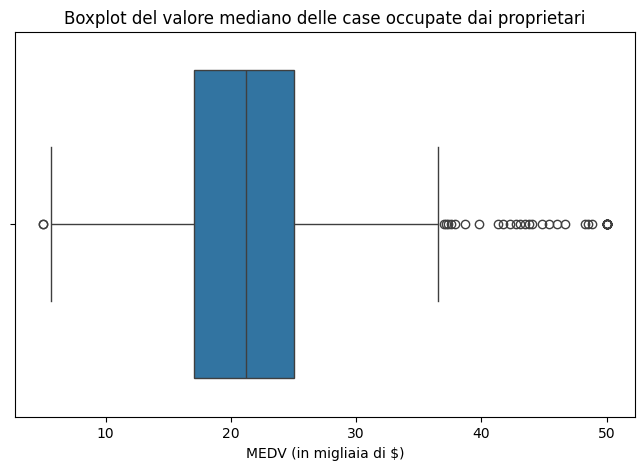

Il boxplot mostra la distribuzione del valore mediano delle case. Aiuta a individuare la presenza di outlier e a comprendere la variazione dei prezzi delle abitazioni.


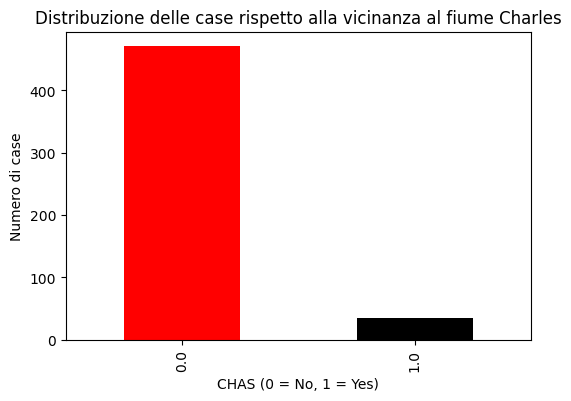

Il grafico mostra che la maggior parte delle case non si trova vicino al fiume Charles. La variabile CHAS è binaria e indica se un'abitazione è adiacente al fiume, il che può influenzare il valore delle case.


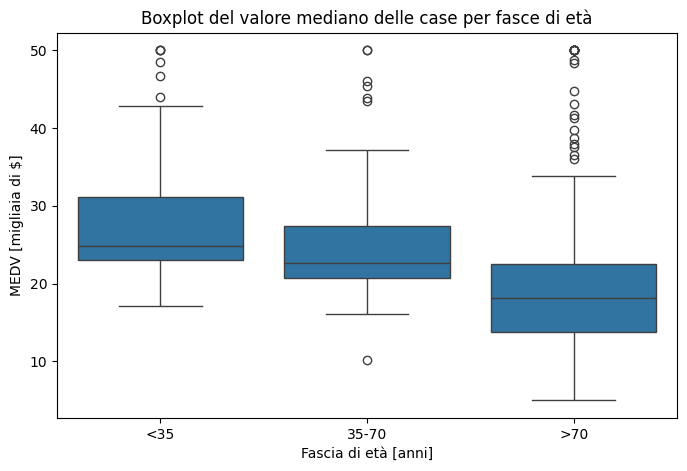

Questo boxplot mostra il valore delle case suddivise per età dell'immobile. In generale, le case più nuove tendono ad avere valori medi più alti, mentre quelle più vecchie presentano una maggiore variazione di prezzo e più outlier.


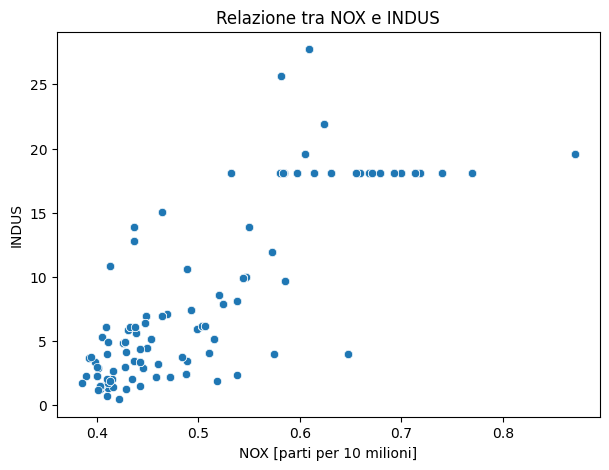

Il grafico evidenzia una correlazione positiva tra l'inquinamento dell'aria (NOX) e la percentuale di terreni non residenziali (INDUS). Ciò suggerisce che le zone più industrializzate tendono ad avere livelli di inquinamento più elevati.


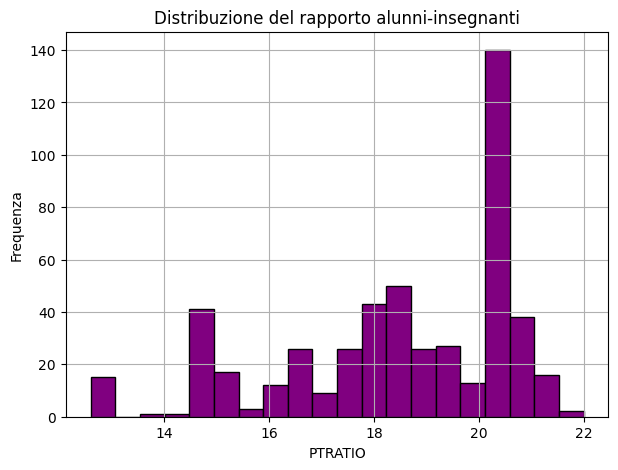

L'istogramma mostra la distribuzione del rapporto alunni-insegnanti nelle scuole del dataset. La maggior parte dei valori si concentra tra 14 e 22, indicando una variabilità nel numero di studenti per insegnante nelle diverse aree.
++++++++++++++++++++++++++++ T-Test per CHAS vs MEDV ++++++++++++++++++++++++++++
Ipotesi nulla: Non vi è differenza significativa tra i valori delle case vicino e lontano dal fiume
Ipotesi alternativa: vi è una differenza significativa tra i valori delle case vicino e lontano dal fiume
T-test CHAS vs MEDV: t=3.99644, p=0.00007
Il test T confronta il valore delle case tra le zone vicino e lontano dal fiume Charles. Un valore p basso indica una differenza statisticamente significativa nei prezzi delle case.
Rifiuto ipotesi nulla perchè il valore di p è minore di 0.05. Accetto l'ipotesi alternativa
C'è una differenza significativa tra i valori delle case vicino e lontano dal fiume.
++++++++++++++++++++++++++++ ANOVA per AGE vs MEDV ++++++++++++++++++++++++++++

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# easy call df
df = boston_df

# print dataset
print("Descrizione del dataset Boston Housing:")
print(df.describe())

# Boxplot per il valore mediano delle case occupate dai proprietari
plt.figure(figsize=(8,5))
sns.boxplot(x=df['MEDV'])
plt.title('Boxplot del valore mediano delle case occupate dai proprietari')
plt.xlabel('MEDV (in migliaia di $)')
plt.show()
print("Il boxplot mostra la distribuzione del valore mediano delle case. Aiuta a individuare la presenza di outlier e a comprendere la variazione dei prezzi delle abitazioni.")

# Grafico a barre per la variabile CHAS
plt.figure(figsize=(6,4))
counts = df['CHAS'].value_counts().sort_index()
counts.plot(kind='bar', color=['red', 'black'])
plt.title('Distribuzione delle case rispetto alla vicinanza al fiume Charles')
plt.xlabel('CHAS (0 = No, 1 = Yes)')
plt.ylabel('Numero di case')
plt.show()
print("Il grafico mostra che la maggior parte delle case non si trova vicino al fiume Charles. La variabile CHAS è binaria e indica se un'abitazione è adiacente al fiume, il che può influenzare il valore delle case.")

# Boxplot di MEDV rispetto a AGE con spiegazione
age_bins = [0, 35, 70, 100]
age_labels = ['<35', '35-70', '>70']
df['AGE_Group'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(8,5))
sns.boxplot(x='AGE_Group', y='MEDV', data=df)
plt.title('Boxplot del valore mediano delle case per fasce di età')
plt.xlabel('Fascia di età [anni]')
plt.ylabel('MEDV [migliaia di $]')
plt.show()
print("Questo boxplot mostra il valore delle case suddivise per età dell'immobile. In generale, le case più nuove tendono ad avere valori medi più alti, mentre quelle più vecchie presentano una maggiore variazione di prezzo e più outlier.")

# Scatter plot tra NOX e INDUS
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['NOX'], y=df['INDUS'])
plt.title('Relazione tra NOX e INDUS')
plt.xlabel('NOX [parti per 10 milioni]')
plt.ylabel('INDUS')
plt.show()
print("Il grafico evidenzia una correlazione positiva tra l'inquinamento dell'aria (NOX) e la percentuale di terreni non residenziali (INDUS). Ciò suggerisce che le zone più industrializzate tendono ad avere livelli di inquinamento più elevati.")

# Istogramma per PTRATIO
plt.figure(figsize=(7,5))
df['PTRATIO'].hist(bins=20, color='purple', edgecolor='black')
plt.title('Distribuzione del rapporto alunni-insegnanti')
plt.xlabel('PTRATIO')
plt.ylabel('Frequenza')
plt.show()
print("L'istogramma mostra la distribuzione del rapporto alunni-insegnanti nelle scuole del dataset. La maggior parte dei valori si concentra tra 14 e 22, indicando una variabilità nel numero di studenti per insegnante nelle diverse aree.")

print('++++++++++++++++++++++++++++ T-Test per CHAS vs MEDV ++++++++++++++++++++++++++++')
print('Ipotesi nulla: Non vi è differenza significativa tra i valori delle case vicino e lontano dal fiume')
print('Ipotesi alternativa: vi è una differenza significativa tra i valori delle case vicino e lontano dal fiume')

group1 = df[df['CHAS'] == 1]['MEDV']
group0 = df[df['CHAS'] == 0]['MEDV']
t_stat, p_value = stats.ttest_ind(group1, group0)
print(f'T-test CHAS vs MEDV: t={t_stat:.5f}, p={p_value:.5f}')
print("Il test T confronta il valore delle case tra le zone vicino e lontano dal fiume Charles. Un valore p basso indica una differenza statisticamente significativa nei prezzi delle case.")

# Ciclo if-else per T-Test
if p_value > 0.05:
    print("Accetto ipotesi nulla perchè il valore di p è maggiore di 0.05")
else:
    print("Rifiuto ipotesi nulla perchè il valore di p è minore di 0.05. Accetto l'ipotesi alternativa\nC'è una differenza significativa tra i valori delle case vicino e lontano dal fiume.")

print('++++++++++++++++++++++++++++ ANOVA per AGE vs MEDV ++++++++++++++++++++++++++++')
print('Ipotesi nulla: età degli immobili non influisce sul valore mediano delle case')
print('Ipotesi alternativa: età degli immobili influisce sul valore mediano delle case')

anova_stat, anova_p = stats.f_oneway(
    df[df['AGE'].between(0, 35)]['MEDV'],
    df[df['AGE'].between(35, 70)]['MEDV'],
    df[df['AGE'].between(70, 100)]['MEDV']
)
print(f'ANOVA Age vs MEDV: F={anova_stat:.5f}, p={anova_p:.5f}')
print("Il test ANOVA analizza le differenze nei valori delle case tra diverse fasce di età, valutando se l'età dell'immobile ha un impatto significativo sul prezzo.")

# Ciclo if-else per ANOVA
if anova_p > 0.05:
    print("Accetto ipotesi nulla perchè il valore di p è maggiore di 0.05")
else:
    print("Rifiuto ipotesi nulla perchè il valore di p è minore di 0.05. Accetto l'ipotesi alternativa\nL'età degli immobili influisce sul valore mediano delle case.")

print('++++++++++++++++++++++++++++ Correlazione Pearson tra NOX e INDUS ++++++++++++++++++++++++++++')
print('Ipotesi nulla: Non esiste correlazione tra inquinamento (NOX) e percentuale di terreni industriali (INDUS)')
print('Ipotesi alternativa: Esiste una correlazione tra NOX e INDUS')

corr, p_corr = stats.pearsonr(df['NOX'], df['INDUS'])
print(f'Correlazione Pearson NOX-INDUS: r={corr:.5f}, p={p_corr:.5f}')
print("Misura la correlazione tra inquinamento e aree industriali, evidenziando la relazione tra la densità industriale e la qualità dell'aria.")

# Ciclo if-else per Correlazione Pearson
if p_corr > 0.05:
    print("Accetto ipotesi nulla perchè il valore di p è maggiore di 0.05")
else:
    print("Rifiuto ipotesi nulla perchè il valore di p è minore di 0.05. Accetto l'ipotesi alternativa\nEsiste una correlazione tra NOX e INDUS.")

print('++++++++++++++++++++++++++++ Regressione tra DIS e MEDV ++++++++++++++++++++++++++++')
print('Ipotesi nulla: La distanza dai centri di lavoro (DIS) non ha un effetto significativo sul valore delle case (MEDV)')
print('Ipotesi alternativa: La distanza dai centri di lavoro (DIS) ha un effetto significativo sul valore delle case (MEDV)')

slope, intercept, r_value, p_value, std_err = stats.linregress(df['DIS'], df['MEDV'])
print(f'Regressione DIS-MEDV: slope={slope:.4f}, intercept={intercept:.4f}, r_value={r_value:.4f}, p_value={p_value:.4f}')
print("Un coefficiente di regressione negativo indica che all'aumentare della distanza ponderata dai centri di lavoro (DIS), il valore mediano delle abitazioni (MEDV) tende a diminuire. Questo suggerisce che le case più vicine ai centri urbani sono più costose.")

# Ciclo if-else per Regressione
if p_value > 0.05:
    print("Accetto ipotesi nulla perchè il valore di p è maggiore di 0.05")
else:
    print("Rifiuto ipotesi nulla perchè il valore di p è minore di 0.05. Accetto l'ipotesi alternativa\nLa distanza dai centri di lavoro (DIS) ha un effetto significativo sul valore delle case (MEDV)")
